# Calibração de ruído

Rode a célula abaixo e selecione os pontos nos ratos corrigindo o ruído.

Loading keypoints:   0%|                         | 0/33 [00:00<?, ?it/s]

Loading keypoints: 100%|████████████████| 33/33 [00:01<00:00, 23.47it/s]


1/33: R0G39S1DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
2/33: R0G39S2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
3/33: R0G39TDLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
4/33: R1G39H1DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
5/33: R1G39H2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
6/33: R1G39H3DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
7/33: R2G39H1DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
8/33: R2G39H2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
9/33: R2G39H3DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
10/33: R2G39S2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
11/33: R2G39TDLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
12/33: R3G39H1DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
13/33: R3G39H2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
14/33: R3G39H3DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
15/33: R0G68S2DLC_HrnetW48_elm_msMay6shuffle1_snapshot_best-2910
16/33: R0G68TDLC_HrnetW48_elm_msMay6

Loading sample frames: 100%|████████████| 80/80 [00:02<00:00, 27.12it/s]


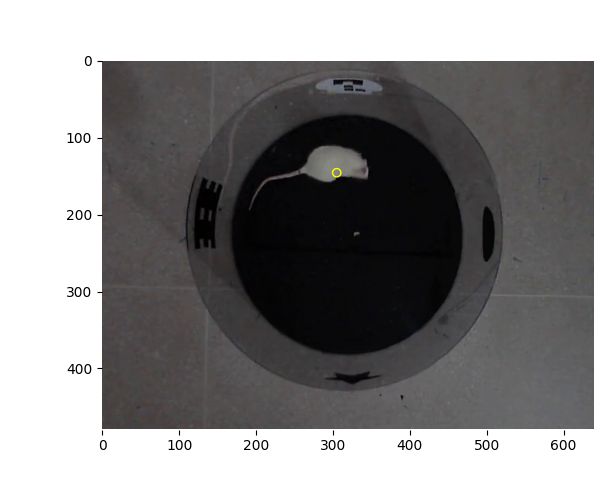

In [3]:
import keypoint_moseq as kpms # type: ignore
from utils.video_frame_indexes import get_video_frame_indexes
from utils.find_medoid_distance_outliers import filter_outliers

project_name = 'elm_ms'
project_dir = f'projects/{project_name}'

config = kpms.load_config(project_dir)
coordinates, confidences, bodyparts = kpms.load_keypoints(
    config["video_dir"], "deeplabcut", extension=".csv"
)
coordinates, confidences, video_frame_indexes = get_video_frame_indexes(coordinates, confidences)
coordinates, confidences, _ = filter_outliers(coordinates, confidences, config)

%matplotlib widget
kpms.noise_calibration(project_dir, coordinates, confidences, video_frame_indexes=video_frame_indexes, **config)
